In [8]:
import os
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10 , 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, roc_auc_score,confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns



In [13]:
test_data = pd.read_csv('D:/The_ultimate_coding/Exoplanet_prediction/exoTest.csv').fillna(0)
train_data = pd.read_csv('D:/The_ultimate_coding/Exoplanet_prediction/exoTrain.csv').fillna(0)


In [14]:
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [15]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]
#now the target column label consist of two categories one doesnt consist of exoplanets and one consist of exoplanets
#so converting  them to binary values for easier processing of data

In [16]:
#Reduce memory
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category').end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return test_data, reduce_memory(test_data)


Text(0.5, 1.0, 'Class Distribution \n (0: NotExoplanet  || 1: Exoplanet)')

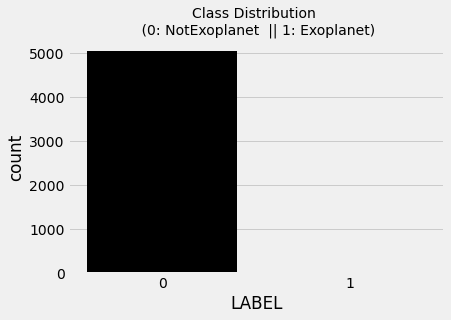

In [17]:
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette=colors)
plt.title('Class Distribution \n (0: NotExoplanet  || 1: Exoplanet)', fontsize=14)

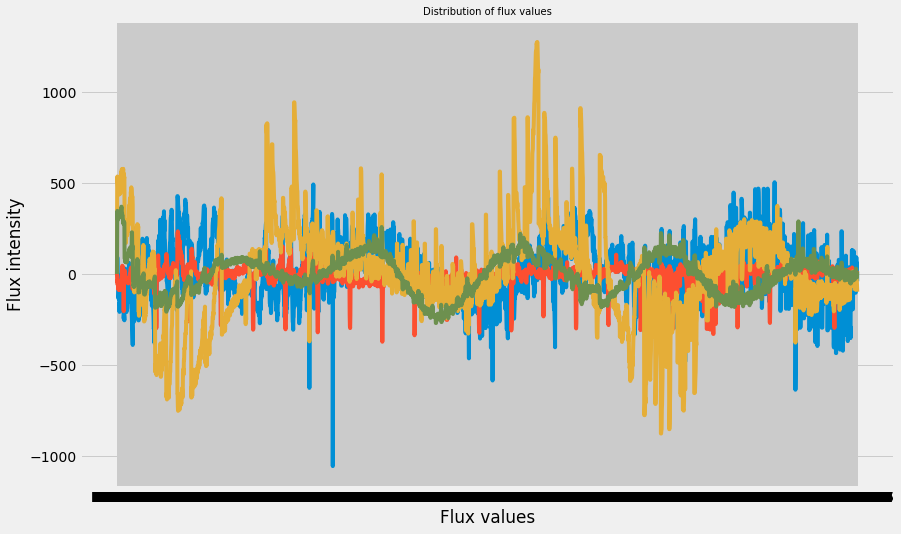

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
plt.title('Distribution of flux values', fontsize=10)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.show()



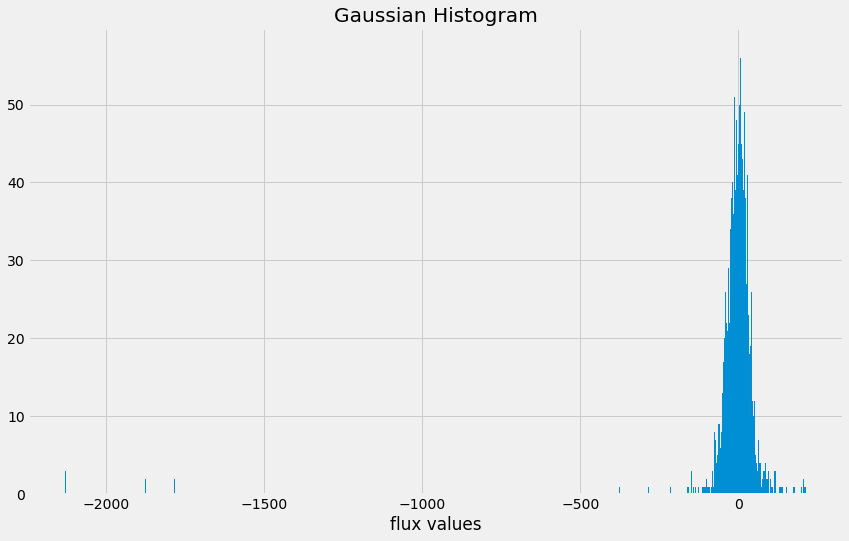

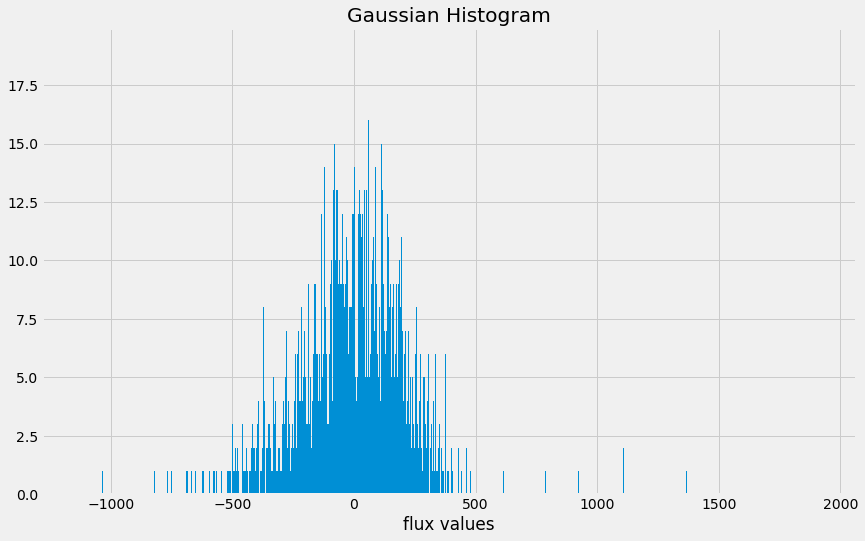

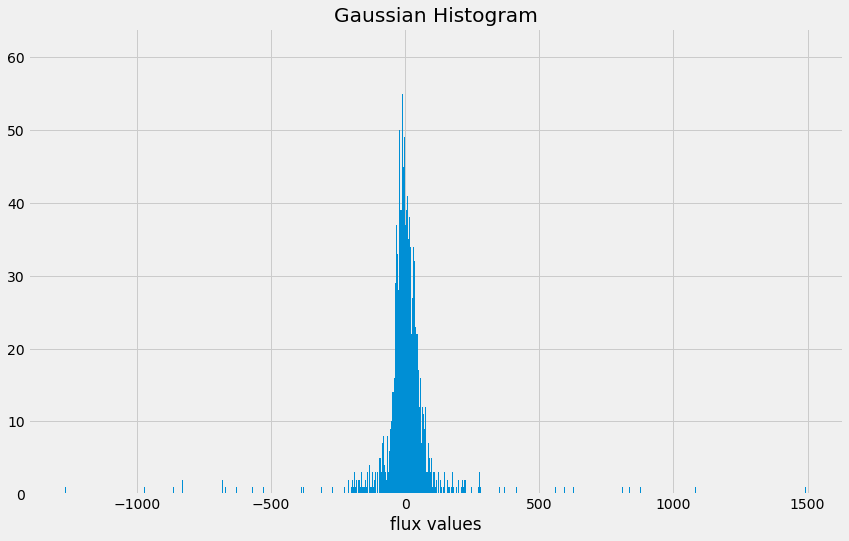

In [19]:
labels_1 = [100,200,300]
for i in labels_1:
    plt.hist(train_data.iloc[i,:], bins=2000)
    plt.title("Gaussian Histogram")
    plt.xlabel("flux values")
    plt.show()
#where exoplanets are not prresent

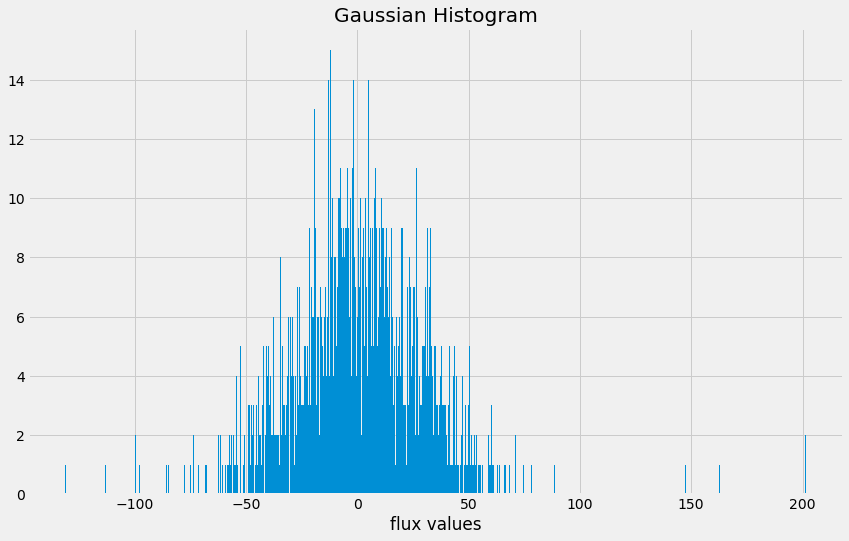

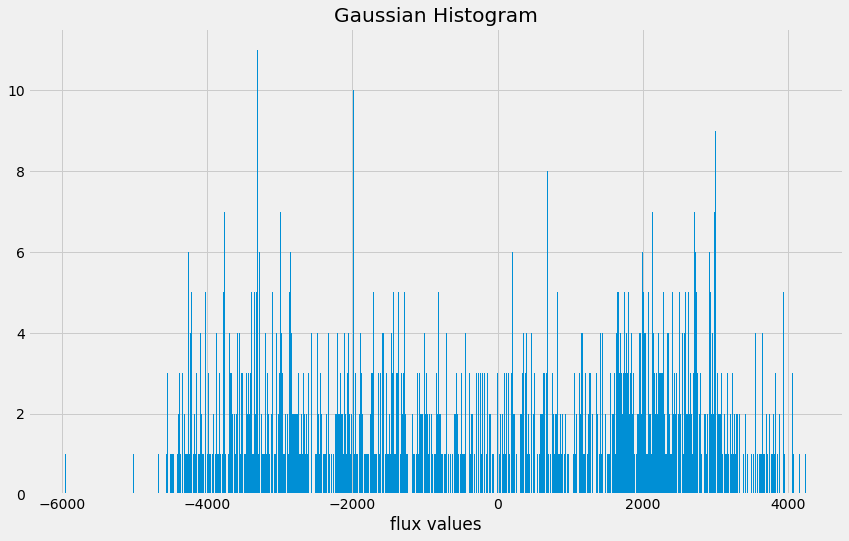

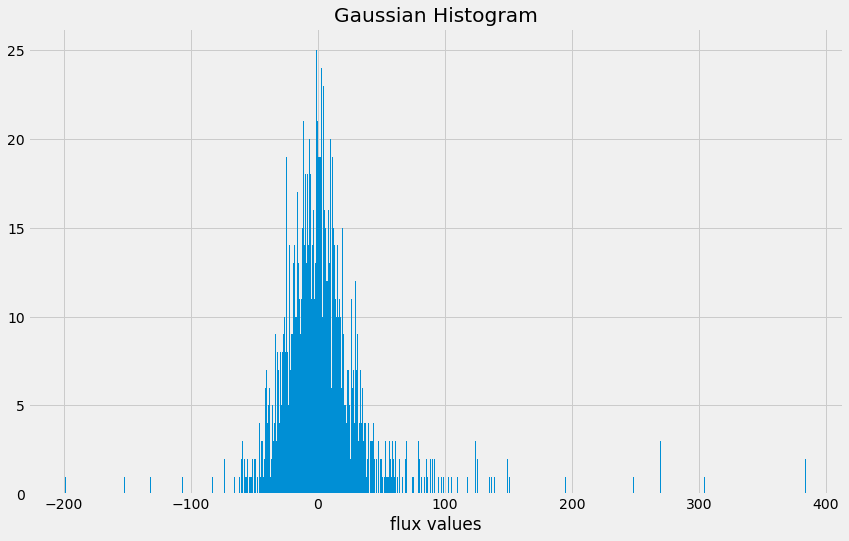

In [20]:
#where exoplanets are present
labels_1 = [16,21,25]
for i in labels_1:
    plt.hist(train_data.iloc[i,:], bins=2000)
    plt.title("Gaussian Histogram")
    plt.xlabel("flux values")
    plt.show()

In [21]:
#data normalization

x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]
x_test  = test_data.drop(["LABEL"],axis=1)
y_test  = test_data["LABEL"]


In [22]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)


In [23]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

In [24]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

#we use feature scaling so that all the values remain in the comparable range.

In [25]:
#we have too much of rows /columns and features in our data its 5087 rows and 3198 columns . Basically we need to decrease these features
#The number of columns/features that we have been working with is huge. We have 5087 rows and 3198 columns in our training dataset. Basically we need to decrease the number of features(Dimentioanlity Reduction) to remove the possibility of Curse of Dimensionality.

#For reducing the number of dimensions/features we will use the most popular dimensionality reduction algorithm i.e. PCA(Principal Component Analysis).

#To perform PCA we have to choose the number of features/dimensions that we want in our data.
#Dimentioanlity reduction
from sklearn.decomposition import PCA
pca = PCA() 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1

In [26]:
print(k)

37


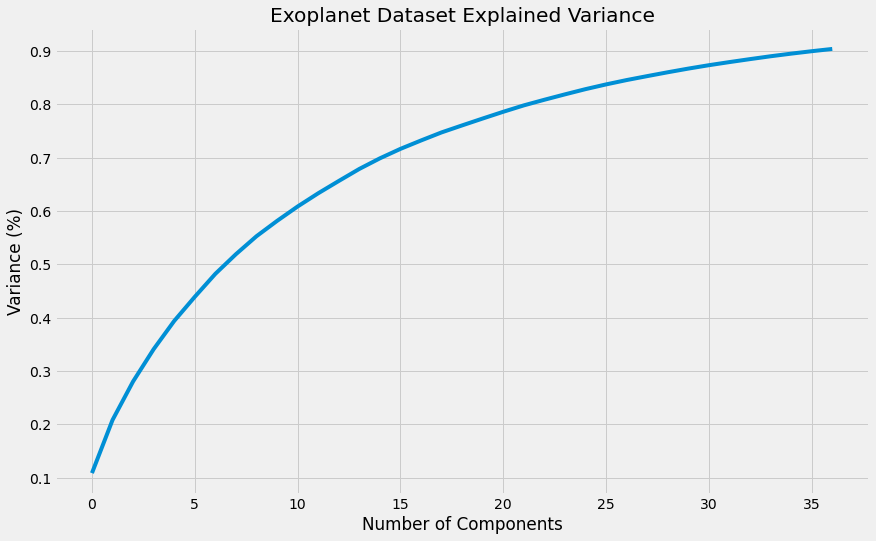

In [27]:
#now late take us k and apply pca on our independent variables

pca = PCA(n_components=37)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [30]:
x_train.shap

(5087, 37)

In [31]:
x_test.shape

(570, 37)

In [ ]:
#The number of columns got reduced to 37 in both test and train datasets.

#Now moving on to the next step, as we know the target class is not equally distributed and one class dominates the other. So we need to resample our data so that the target class is equally distributed.

#There are 4 ways of addressing class imbalance problems like these:

#Synthesis of new minority class instances
#Over-sampling of minority class
#Under-sampling of the majority class
#Tweak the cost function to make misclassification of minority instances more important than misclassification of majority instances.

In [49]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(random_state=27)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 37
Before OverSampling, counts of label '0': 5050 

After OverSampling, counts of label '1': 5050
After OverSampling, counts of label '0': 5050


In [65]:
def model (classifier, dtrain_x, dtrain_y, dtest_x, dtest_y):
    classifier.fit(dtrain_x, dtrain_y)
    predictions = classifier.predict(dtest_x)
    
    #cross validation
    accuracies = cross_val_score(estimator = classifier, X = x_train_res, y= y_train_res, cv = 5, n_jobs = -1)
    mean = accuracies.mean()
    variance = accuracies.mean()
    print("Accuracies mean:" +str(mean))
    print("Accuracy Variance" +str(variance))
    
    
    #accuracy
    print("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    #classification report
    print("\nclassififcation report :\n",(classification_report(dtest_y, predictions)))
    
    
    #confusion matrix
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,cmap="viridis",fmt="d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=20)

Accuracies mean:0.9991089108910891
Accuracy Variance0.9991089108910891

accuracy_score : 0.9912280701754386

classififcation report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



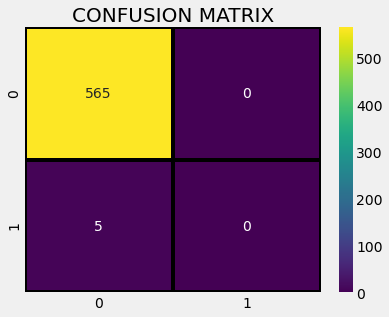

In [66]:
from sklearn.svm import SVC
SVM_model=SVC()
model(SVM_model,x_train_res,y_train_res,x_test,y_test)
